In [1]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
x = df[['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
x_norm = preprocessing.normalize(x)
y = df['medv']

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_norm, y, train_size = 0.7, random_state = 31)

MULTI LINEAR REGRESSION

In [8]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_val_pred = lreg.predict(x_val)
mse = mean_squared_error(y_val, y_val_pred)

In [10]:
print("Multi-linear regression validation MSE is", mse)

Multi-linear regression validation MSE is 20.133951375165253


LASSO REGRESSION

In [11]:
lasso_reg = Lasso(alpha=0.008)
lasso_reg.fit(x_train, y_train)
y_val_pred = lasso_reg.predict(x_val)
mse = mean_squared_error(y_val, y_val_pred)

In [12]:
print("Lasso regression validation MSE is", mse)

Lasso regression validation MSE is 31.676774400084444


RIDGE REGRESSION

In [13]:
ridge_reg = Ridge(alpha=0.008)
ridge_reg.fit(x_train, y_train)
y_val_pred = ridge_reg.predict(x_val)
mse = mean_squared_error(y_val, y_val_pred)

In [14]:
print("Ridge regression validation MSE is", mse)

Ridge regression validation MSE is 28.05365901018081


In [16]:
# Helper code to create a dictionary of the coefficients 
# along with the predictors as keys
lreg_coef = dict(zip(x.columns, np.transpose(lreg.coef_)))

# Linear regression coefficients for plotting
lreg_x = list(lreg_coef.keys())
lreg_y = list(lreg_coef.values())

In [20]:
lasso_coef = dict(zip(x.columns, np.transpose(lasso_reg.coef_))) 

# Get the Lasso regularisation coefficients for plotting
lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())

In [22]:
ridge_coef = dict(zip(x.columns, np.transpose(ridge_reg.coef_))) 

# Ridge regularisation coefficients for plotting
ridge_x = list(ridge_coef.keys())
ridge_y = list(ridge_coef.values())

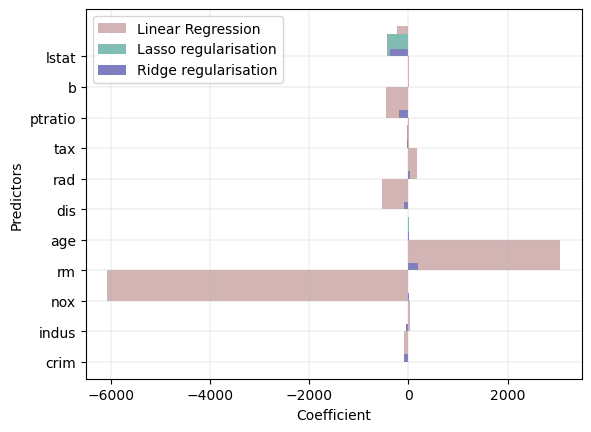

In [23]:

plt.rcdefaults()

plt.barh(lreg_x,lreg_y,1.0, align='edge',color="#D3B4B4", label="Linear Regression")
plt.barh(lasso_x,lasso_y,0.75 ,align='edge',color="#81BDB2",label = "Lasso regularisation")
plt.barh(ridge_x,ridge_y,0.25 ,align='edge',color="#7E7EC0", label="Ridge regularisation")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.legend(loc='best')
plt.xlim(-6500,3500)
plt.show()